In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)
from src.loader import NewsDataLoader
from src.utils import extract_domain
from src.utils import count_country_mentions

# Initialize Dataloader

In [2]:
ndl = NewsDataLoader("../data")
data = ndl.load_data()
data

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral
58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative
58354,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,Neutral


In [3]:
traffic = ndl.load_traffic()
traffic

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,485324,kireie.com,com,222,280,kireie.com,com,-1,-1,-1,-1
999996,999997,485325,mt-lock.com,com,222,280,mt-lock.com,com,952633,461429,232,284
999997,999998,485326,pinkwater.com,com,222,280,pinkwater.com,com,-1,-1,-1,-1
999998,999999,485327,soderhomes.com,com,222,280,soderhomes.com,com,-1,-1,-1,-1


In [4]:
domain = ndl.load_domain_location()
domain

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China
...,...,...,...
37797,zz.diena.lv,LG,Latvia
37798,zz.fjnet.cn,CH,China
37799,zz.mnw.cn,CH,China
37800,zz7.it,IT,Italy


# Who are the top and bottom 10 

## What Websites that have the largest count of news articles?

In [5]:
news_count = data.groupby("source_name").count()

###  Top 10

In [6]:
news_count.sort_values("article_id", ascending=False)[0:10]

,article_id,source_id,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
source_name,,,,,,,,,,,,
ETF Daily News,16746,0,16746,16746,16746,16746,16746,16746,16746,16742,16746,16746
The Times of India,7504,7504,7490,7504,7498,7504,7504,7504,7504,7504,7504,7504
GlobeNewswire,5423,0,5423,5423,5423,5423,5132,5423,5423,5423,5423,5423
Globalsecurity.org,3119,0,3119,3119,3119,3119,0,3119,3119,3119,3119,3119
Forbes,2784,0,2784,2784,2784,2784,2784,2784,2784,2783,2784,2784
BBC News,2113,2032,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113
ABC News,2058,2058,2058,2058,2058,2058,2058,2058,2058,2055,2058,2058
Business Insider,2034,2034,2034,2034,2032,2034,2026,2034,2034,2033,2034,2034
The Punch,1800,0,1800,1800,1800,1800,1774,1800,1800,1800,1800,1800


### Bottom 10

In [7]:
news_count.sort_values("article_id", ascending=True)[0:10]

,article_id,source_id,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
source_name,,,,,,,,,,,,
AllAfrica - Top Africa News,20,0,20,20,20,20,20,20,20,20,20,20
The Verge,214,214,214,214,214,214,214,214,214,214,214,214
CNN,267,267,263,267,267,267,267,267,267,267,267,267
Wired,270,270,270,270,270,270,265,270,270,270,270,270
Euronews,286,0,2,286,286,286,286,286,286,286,286,286
ReadWrite,324,0,324,324,324,324,324,324,324,324,324,324
Gizmodo.com,388,0,388,388,388,388,388,388,388,388,388,388
Android Central,522,0,522,522,522,522,521,522,522,522,522,522
Time,600,600,600,600,600,600,599,600,600,600,600,600


## Websites with the highest numbers of visitors traffic

In [8]:
data["Domain"] = data["url"].map(extract_domain)
data_traffic = data.merge(traffic, left_on="Domain", right_on="Domain")
data_traffic_unique_asc = data_traffic.sort_values(by='GlobalRank', ascending=True).drop_duplicates(subset='Domain').reset_index(drop=True)

### Top 10

In [9]:
data_traffic_unique_asc.loc[0:9,["source_name","GlobalRank","Domain"]]

,source_name,GlobalRank,Domain
0,Forbes,64,forbes.com
1,CNN,78,cnn.com
2,BBC News,87,bbc.co.uk
3,BBC News,92,bbc.com
4,Business Insider,115,businessinsider.com
5,Time,137,time.com
6,NPR,147,npr.org
7,Wired,148,wired.com
8,The Verge,202,theverge.com
9,Gizmodo.com,403,gizmodo.com


### Bottom 10

In [10]:
data_traffic_unique_asc = data_traffic.sort_values(by='GlobalRank', ascending=True).drop_duplicates(subset='Domain').reset_index(drop=True)
data_traffic_unique_asc.loc[0:9,["source_name","GlobalRank","Domain"]]

,source_name,GlobalRank,Domain
0,Forbes,64,forbes.com
1,CNN,78,cnn.com
2,BBC News,87,bbc.co.uk
3,BBC News,92,bbc.com
4,Business Insider,115,businessinsider.com
5,Time,137,time.com
6,NPR,147,npr.org
7,Wired,148,wired.com
8,The Verge,202,theverge.com
9,Gizmodo.com,403,gizmodo.com


## Countries with the highest number of news media organisations (represented by domains in the data)


In [11]:

country_counts = domain.groupby('Country').count()

country_counts = country_counts.rename(columns={'SourceCommonName': 'NumberOfMediaOrganizations'})



### Top 10

In [12]:
country_counts_sorted_dsc = country_counts.sort_values(by='NumberOfMediaOrganizations', ascending=False)
country_counts_sorted_dsc[0:10]

,NumberOfMediaOrganizations,location
Country,,
United States,14111,14111
United Kingdom,1950,1950
Italy,1810,1810
France,1041,1041
Russia,1024,1024
Canada,887,887
Germany,884,884
China,780,780
Turkey,725,725


### One organization

In [13]:
country_counts_sorted_dsc =country_counts_sorted_dsc[country_counts_sorted_dsc["NumberOfMediaOrganizations"]==1]
country_counts_sorted_dsc

,NumberOfMediaOrganizations,location
Country,,
Aruba,1,1
Isle of Man,1,1
Guernsey,1,1
Guinea-Bissau,1,1
Guadeloupe,1,1
Greenland,1,1
Comoros,1,1
Cook Islands,1,1
American Samoa,1,1


## Countries that have many articles written about them - the content of the news is about that country


In [14]:
countries = domain['Country'].dropna().unique()

country_mentions = data['content'].map(lambda x: count_country_mentions(x, countries))

In [15]:

mentions_df = pd.DataFrame(country_mentions.tolist())
total_mentions = mentions_df.sum().sort_values(ascending=False).reset_index()
total_mentions.columns = ['Country', 'NumberOfMentions']


### Top 10

In [16]:
total_mentions[0:10]

,Country,NumberOfMentions
0,India,2321
1,Israel,2003
2,China,1062
3,United States,1058
4,Ukraine,1023
5,Russia,733
6,Canada,658
7,Iran,607
8,Australia,529
9,Nigeria,470


### Zero mentions

In [17]:
zero_mentions = total_mentions[total_mentions['NumberOfMentions'] == 0]
zero_mentions

,Country,NumberOfMentions
206,Antigua and Barbuda,0
207,Keeling Islands,0
208,British Indian Ocean Territory,0
209,South Georgia and the South Sandwich Islands,0
210,Cape Verde,0
211,Anguilla,0
212,Niue,0
213,Guadeloupe,0
214,New Caledonia,0
215,American Samoa,0


##  Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle East


## Websites with the highest count of positive, neutral, and negative sentiment?


In [18]:
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
data['Sentiment'] = data['title_sentiment'].map(sentiment_mapping)

In [19]:
sentiment_stats = data.groupby('source_name').agg(
    positive_count=pd.NamedAgg(column='Sentiment', aggfunc=lambda x: (x == 1).sum()),
    neutral_count=pd.NamedAgg(column='Sentiment', aggfunc=lambda x: (x == 0).sum()),
    negative_count=pd.NamedAgg(column='Sentiment', aggfunc=lambda x: (x == -1).sum()),
    mean_sentiment=pd.NamedAgg(column='Sentiment', aggfunc='mean'),
    median_sentiment=pd.NamedAgg(column='Sentiment', aggfunc='median'),
    variance_sentiment=pd.NamedAgg(column='Sentiment', aggfunc='var')
).reset_index()

### Mean and median

In [20]:
sentiment_stats.loc[:,["source_name","mean_sentiment","median_sentiment"]]

,source_name,mean_sentiment,median_sentiment
0,ABC News,-0.285228,0.0
1,Al Jazeera English,-0.405649,0.0
2,AllAfrica - Top Africa News,-0.400000,0.0
3,Android Central,0.448276,1.0
4,BBC News,-0.369143,0.0
5,Boing Boing,-0.112202,0.0
6,Business Insider,-0.321042,0.0
7,CNA,-0.059347,0.0
8,CNN,-0.295880,0.0
9,Deadline,-0.032189,0.0


### Positive

#### Top 10 

In [21]:
sorted_positive_dsc = sentiment_stats.sort_values(by='positive_count', ascending=False).reset_index(drop=True)
sorted_positive_dsc.loc[0:9,["source_name","positive_count"]]

,source_name,positive_count
0,The Times of India,1145
1,ETF Daily News,992
2,GlobeNewswire,905
3,Forbes,635
4,Digital Trends,406
5,Android Central,272
6,Business Insider,237
7,Boing Boing,170
8,Marketscreener.com,153
9,Phys.Org,143


#### Bottom 10

In [22]:
sorted_positive_asc = sentiment_stats.sort_values(by='positive_count', ascending=True).reset_index(drop=True)
sorted_positive_asc.loc[0:9,["source_name","positive_count"]]

,source_name,positive_count
0,AllAfrica - Top Africa News,0
1,Euronews,15
2,CNN,23
3,RT,27
4,Al Jazeera English,31
5,Time,33
6,International Business Times,44
7,Deadline,54
8,Gizmodo.com,59
9,The Verge,61


### Negative

#### Top 10

In [23]:
sorted_negative_dsc = sentiment_stats.sort_values(by='negative_count', ascending=False).reset_index(drop=True)
sorted_negative_dsc.loc[0:9,["source_name","negative_count"]]

,source_name,negative_count
0,The Times of India,1210
1,Business Insider,890
2,BBC News,854
3,Globalsecurity.org,747
4,ABC News,726
5,Al Jazeera English,706
6,ETF Daily News,560
7,The Punch,455
8,RT,403
9,International Business Times,319


#### Bottom 10

In [24]:
sorted_negative_asc = sentiment_stats.sort_values(by='negative_count', ascending=True).reset_index(drop=True)
sorted_negative_asc.loc[0:9,["source_name","negative_count"]]

,source_name,negative_count
0,AllAfrica - Top Africa News,8
1,GlobeNewswire,27
2,The Verge,35
3,Android Central,38
4,ReadWrite,38
5,Marketscreener.com,42
6,Digital Trends,43
7,Wired,65
8,Gizmodo.com,76
9,Deadline,84


## Neutral

#### Top 10

In [25]:

sorted_neutral_dsc = sentiment_stats.sort_values(by='neutral_count', ascending=False).reset_index(drop=True)
sorted_neutral_dsc.loc[0:9,["source_name","neutral_count"]]

,source_name,neutral_count
0,ETF Daily News,15194
1,The Times of India,5149
2,GlobeNewswire,4491
3,Globalsecurity.org,2255
4,Forbes,1933
5,The Punch,1229
6,ABC News,1193
7,BBC News,1185
8,Marketscreener.com,1167
9,Al Jazeera English,927


#### Bottom 10

In [26]:

sorted_neutral_asc = sentiment_stats.sort_values(by='neutral_count', ascending=True).reset_index(drop=True)
sorted_neutral_asc.loc[0:9,["source_name","neutral_count"]]

,source_name,neutral_count
0,AllAfrica - Top Africa News,12
1,The Verge,118
2,Wired,138
3,CNN,142
4,Euronews,157
5,Android Central,212
6,ReadWrite,216
7,Gizmodo.com,253
8,Boing Boing,293
9,Digital Trends,335


# Compare the content metadata across sites 


## How similar are the raw message lengths across sites? Check the distribution among sites

                     source_name        mean  median          var        std
0                       ABC News  213.101069   214.0    45.436547   6.740664
1             Al Jazeera English  212.943510   213.0    16.847078   4.104519
2    AllAfrica - Top Africa News  213.350000   213.0     0.344737   0.587143
3                Android Central  213.961686   214.0     0.178951   0.423027
4                       BBC News  212.409371   213.0    98.866901   9.943184
5                    Boing Boing  213.502104   214.0     0.430122   0.655837
6               Business Insider  213.211898   213.0     0.329401   0.573935
7                            CNA  213.375371   214.0     1.557253   1.247899
8                            CNN  213.573034   214.0     0.441075   0.664134
9                       Deadline  213.456009   214.0     1.157032   1.075654
10                Digital Trends  213.608418   214.0     0.376481   0.613580
11                ETF Daily News  213.936462   214.0     0.125315   0.353998

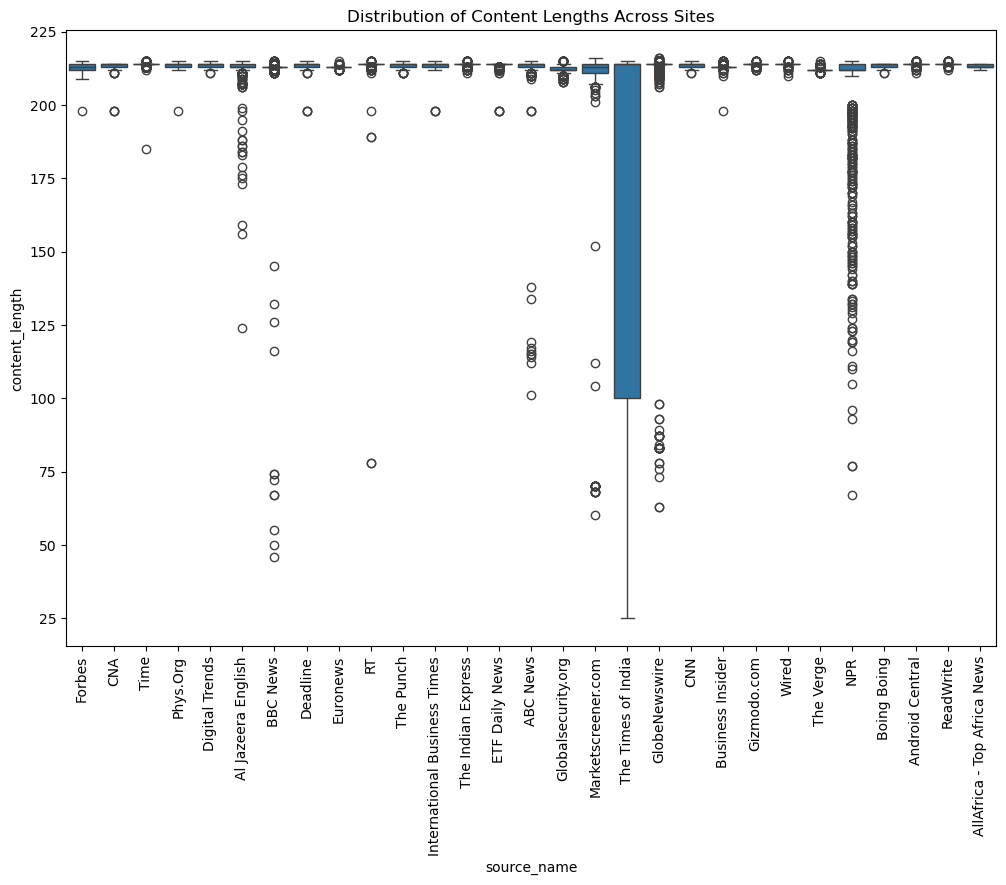

In [27]:
data['content_length'] = data['content'].map(lambda x: len(str(x)))


length_stats = data.groupby('source_name')['content_length'].agg(['mean', 'median', 'var', 'std']).reset_index()

print(length_stats)


plt.figure(figsize=(12, 8))
sns.boxplot(x='source_name', y='content_length', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Content Lengths Across Sites')
plt.show()

## How similar are the number of words in the title across sites? Check the distribution among sites


                     source_name       mean  median        var       std
0                       ABC News  13.480078    14.0   6.889491  2.624784
1             Al Jazeera English  10.158654    10.0   3.485337  1.866906
2    AllAfrica - Top Africa News   9.950000    10.0   4.365789  2.089447
3                Android Central  12.243295    12.0   8.322652  2.884901
4                       BBC News   9.342168     9.0   3.157014  1.776799
5                    Boing Boing  12.150070    12.0  16.200762  4.025017
6               Business Insider  18.022616    18.0  26.858318  5.182501
7                            CNA  10.954006    11.0   7.116752  2.667724
8                            CNN  13.235955    13.0  13.444116  3.666622
9                       Deadline  15.516094    15.0  24.756991  4.975640
10                Digital Trends  10.858418    11.0   4.596787  2.144012
11                ETF Daily News  10.767945    11.0   5.944594  2.438154
12                      Euronews  11.678322    12.0

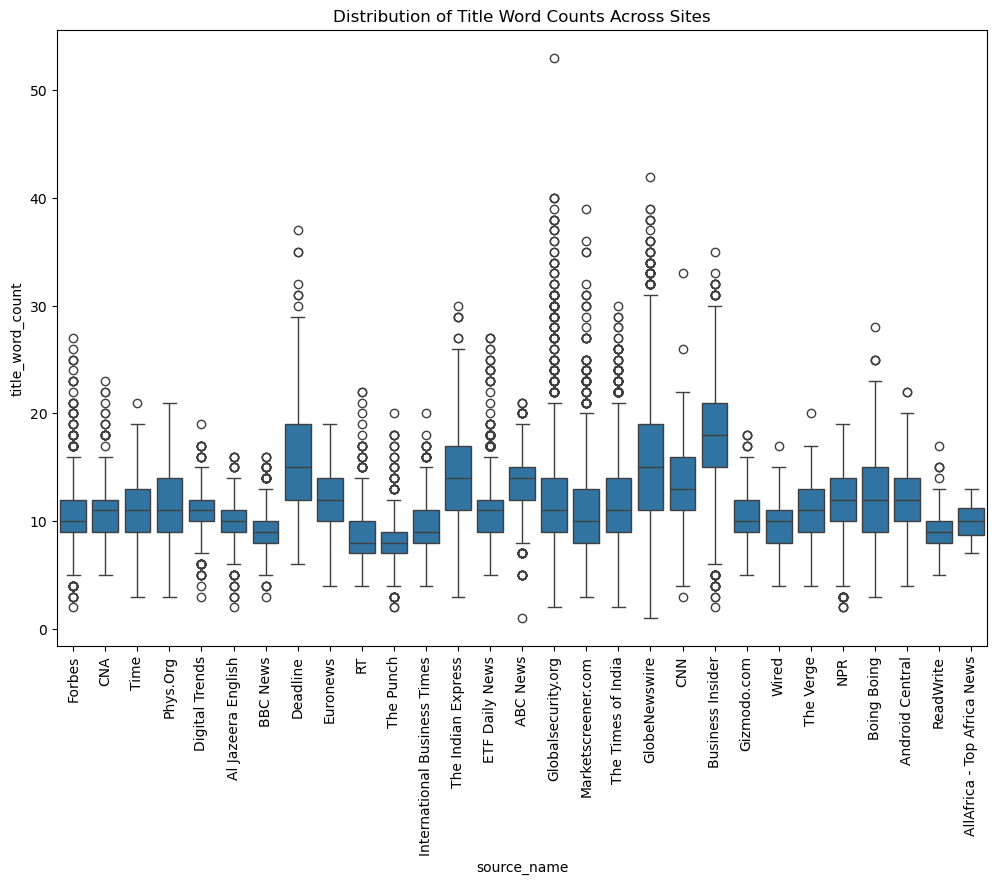

In [28]:
data['title_word_count'] = data['title'].map(lambda x: len(str(x).split()))

title_stats = data.groupby('source_name')['title_word_count'].agg(['mean', 'median', 'var', 'std']).reset_index()

print(title_stats)

plt.figure(figsize=(12, 8))
sns.boxplot(x='source_name', y='title_word_count', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Title Word Counts Across Sites')
plt.show()

# What is the impact of frequent news reporting and sentiment to the website’s global ranking? 


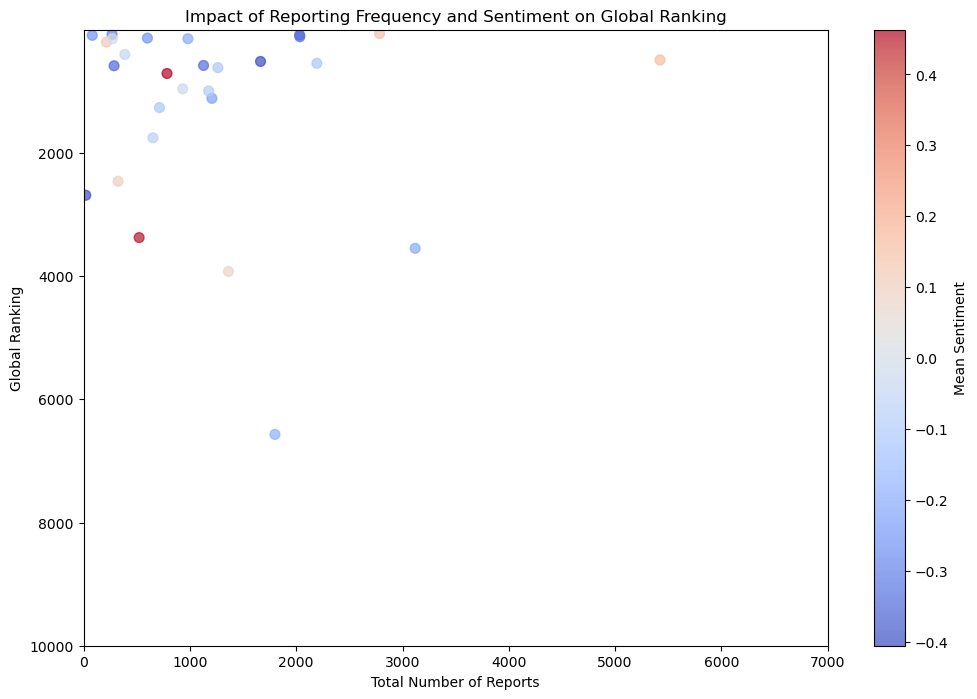

In [29]:
data["Domain"] = data["url"].map(extract_domain)

sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
data['Sentiment'] = data['title_sentiment'].map(sentiment_mapping)

sentiment_stats = data.groupby('Domain').agg(
    total_reports=pd.NamedAgg(column='Sentiment', aggfunc='count'),
    positive_count=pd.NamedAgg(column='Sentiment', aggfunc=lambda x: (x == 1).sum()),
    neutral_count=pd.NamedAgg(column='Sentiment', aggfunc=lambda x: (x == 0).sum()),
    negative_count=pd.NamedAgg(column='Sentiment', aggfunc=lambda x: (x == -1).sum()),
    mean_sentiment=pd.NamedAgg(column='Sentiment', aggfunc='mean'),
    median_sentiment=pd.NamedAgg(column='Sentiment', aggfunc='median'),
    variance_sentiment=pd.NamedAgg(column='Sentiment', aggfunc='var')
).reset_index()

print
merged_stats = sentiment_stats.merge(traffic[['Domain', 'GlobalRank']], on='Domain', how='left')

total_reports_limit = (0, 7000)  # Adjust these values as needed
global_rank_limit = (1, 10000)  # Adjust these values as needed

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=merged_stats['total_reports'], 
    y=merged_stats['GlobalRank'], 
    c=merged_stats['mean_sentiment'], 
    cmap='coolwarm', 
    s=50, 
    alpha=0.7
)

plt.xlim(total_reports_limit)
plt.ylim(global_rank_limit)
plt.colorbar(scatter, label='Mean Sentiment')
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking')
plt.title('Impact of Reporting Frequency and Sentiment on Global Ranking')
plt.gca().invert_yaxis()  # Invert y-axis since lower ranks are better
plt.show()
